In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def load_and_visualize(filename):
    # 讀取數據
    df = pd.read_csv(filename)
    
    # 計算壅塞程度 (這裡以 demand/supply 比例為例)
    df['horizontal_congestion'] = (df['L_m1'] + df['R_m1'] + df['L_m3'] + df['R_m3']) / (df['left_m1'] + df['right_m1'] + df['left_m3'] + df['right_m3'] + 1e-6)
    df['vertical_congestion'] = (df['T_m2'] + df['B_m2']) / (df['top_m2'] + df['bottom_m2'] + 1e-6)
    # df['total_congestion'] = (df['horizontal_congestion'] + df['vertical_congestion']) / 2
    df['total_congestion'] = (df['L_m1'] + df['R_m1'] + df['L_m3'] + df['R_m3'] + df['T_m2'] + df['B_m2']) / (df['left_m1'] + df['right_m1'] + df['left_m3'] + df['right_m3'] + df['top_m2'] + df['bottom_m2'] + 1e-6)
    
    # 創建熱力圖
    plt.figure(figsize=(12, 10))
    
    # 自定義顏色映射 (綠->黃->紅)
    cmap = LinearSegmentedColormap.from_list('congestion', ['green', 'yellow', 'red'])
    
    # 繪製熱力圖
    sc = plt.scatter(
        df['x'], df['y'], 
        c=df['total_congestion'], 
        cmap=cmap, 
        s=500,  # 點的大小
        edgecolor='black',
        linewidth=0.5
    )
    
    # 添加顏色條
    cbar = plt.colorbar(sc)
    cbar.set_label('Congestion Level (demand/supply)')
    
    # 添加格線
    plt.grid(True, which='both', linestyle=':', alpha=0.7)
    
    # 標題和軸標籤
    plt.title("GCell Congestion Map")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    
    # 顯示每個 GCell 的壅塞值
    for _, row in df.iterrows():
        plt.text(
            row['x'], row['y'], 
            f"{row['total_congestion']:.2f}", 
            ha='center', va='center', 
            fontsize=8, color='black'
        )
    
    plt.tight_layout()
    plt.show()

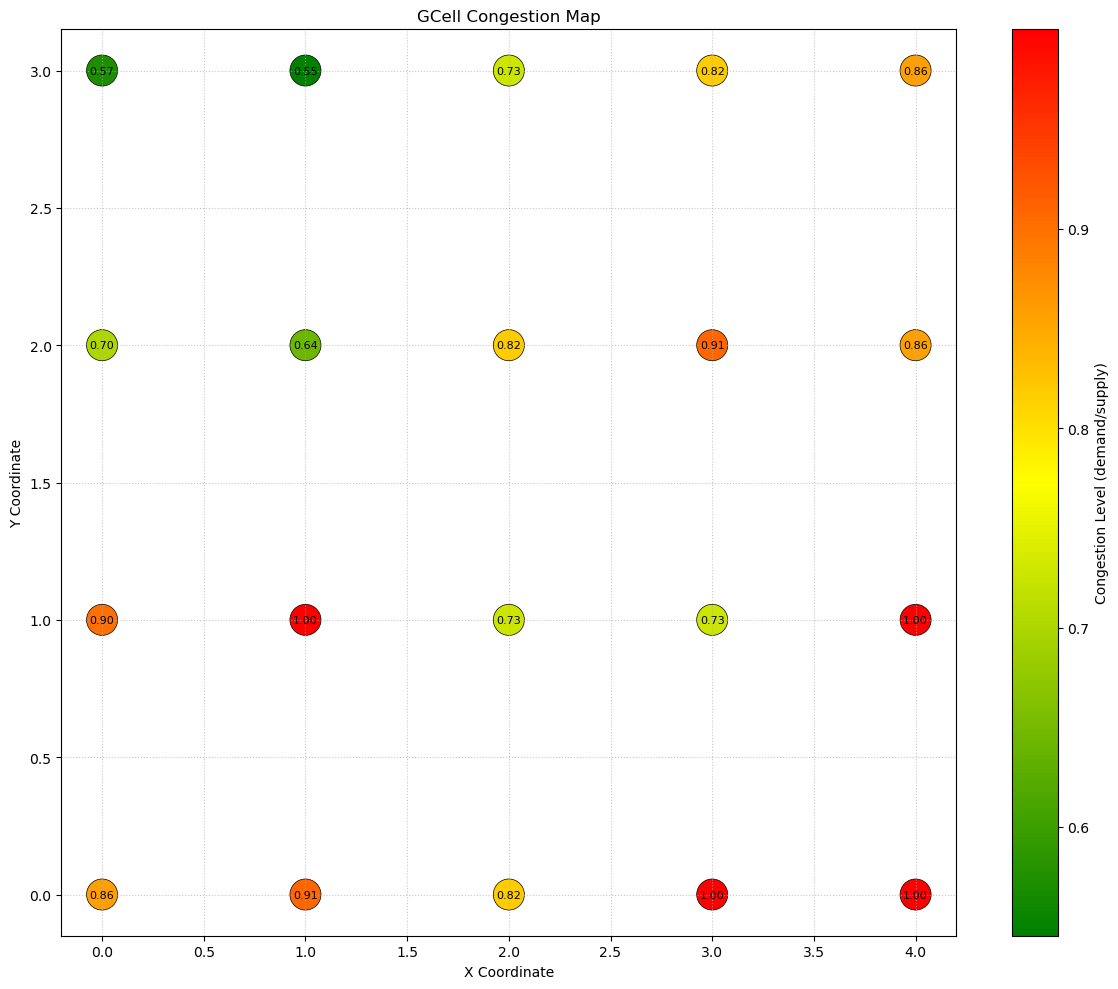

In [6]:
if __name__ == "__main__":
    load_and_visualize("congestion_data.csv")

In [ ]:
def advanced_visualization(filename):
    df = pd.read_csv(filename)
    
    # 創建子圖
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    cmap = LinearSegmentedColormap.from_list('congestion', ['green', 'yellow', 'red'])
    
    # 水平方向壅塞
    # df['horizontal'] = (df['L_m3'] + df['R_m3']) / (df['left_m3'] + df['right_m3'] + 1e-6)
    df['horizontal'] = (df['L_m1'] + df['R_m1'] + df['L_m3'] + df['R_m3']) / (df['left_m1'] + df['right_m1'] + df['left_m3'] + df['right_m3'] + 1e-6)
    sc1 = axes[0,0].scatter(df['x'], df['y'], c=df['horizontal'], cmap=cmap, s=300)
    fig.colorbar(sc1, ax=axes[0,0])
    axes[0,0].set_title("Horizontal Congestion (M3)")
    
    # 垂直方向壅塞
    # df['vertical'] = (df['T_m2'] + df['B_m2']) / (df['top_m2'] + df['bottom_m2'] + 1e-6)
    df['vertical'] = (df['T_m2'] + df['B_m2']) / (df['top_m2'] + df['bottom_m2'] + 1e-6)
    sc2 = axes[0,1].scatter(df['x'], df['y'], c=df['vertical'], cmap=cmap, s=300)
    fig.colorbar(sc2, ax=axes[0,1])
    axes[0,1].set_title("Vertical Congestion (M2)")
    
    # 總壅塞
    # df['total'] = (df['horizontal'] + df['vertical']) / 2
    df['total'] = (df['L_m1'] + df['R_m1'] + df['L_m3'] + df['R_m3'] + df['T_m2'] + df['B_m2']) / (df['left_m1'] + df['right_m1'] + df['left_m3'] + df['right_m3'] + df['top_m2'] + df['bottom_m2'] + 1e-6)
    sc3 = axes[1,0].scatter(df['x'], df['y'], c=df['total'], cmap=cmap, s=300)
    fig.colorbar(sc3, ax=axes[1,0])
    axes[1,0].set_title("Total Congestion")
    
    # 壅塞細節表格
    cell_text = []
    for _, row in df.iterrows():
        cell_text.append([
            f"{row['horizontal']:.2f}", 
            f"{row['vertical']:.2f}", 
            f"{row['total']:.2f}"
        ])
    
    axes[1,1].axis('off')
    table = axes[1,1].table(
        # cellText=cell_text[:10],  # 只顯示前10行
        colLabels=['Horizontal', 'Vertical', 'Total'],
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1, 1.5)
    
    plt.tight_layout()
    plt.show()

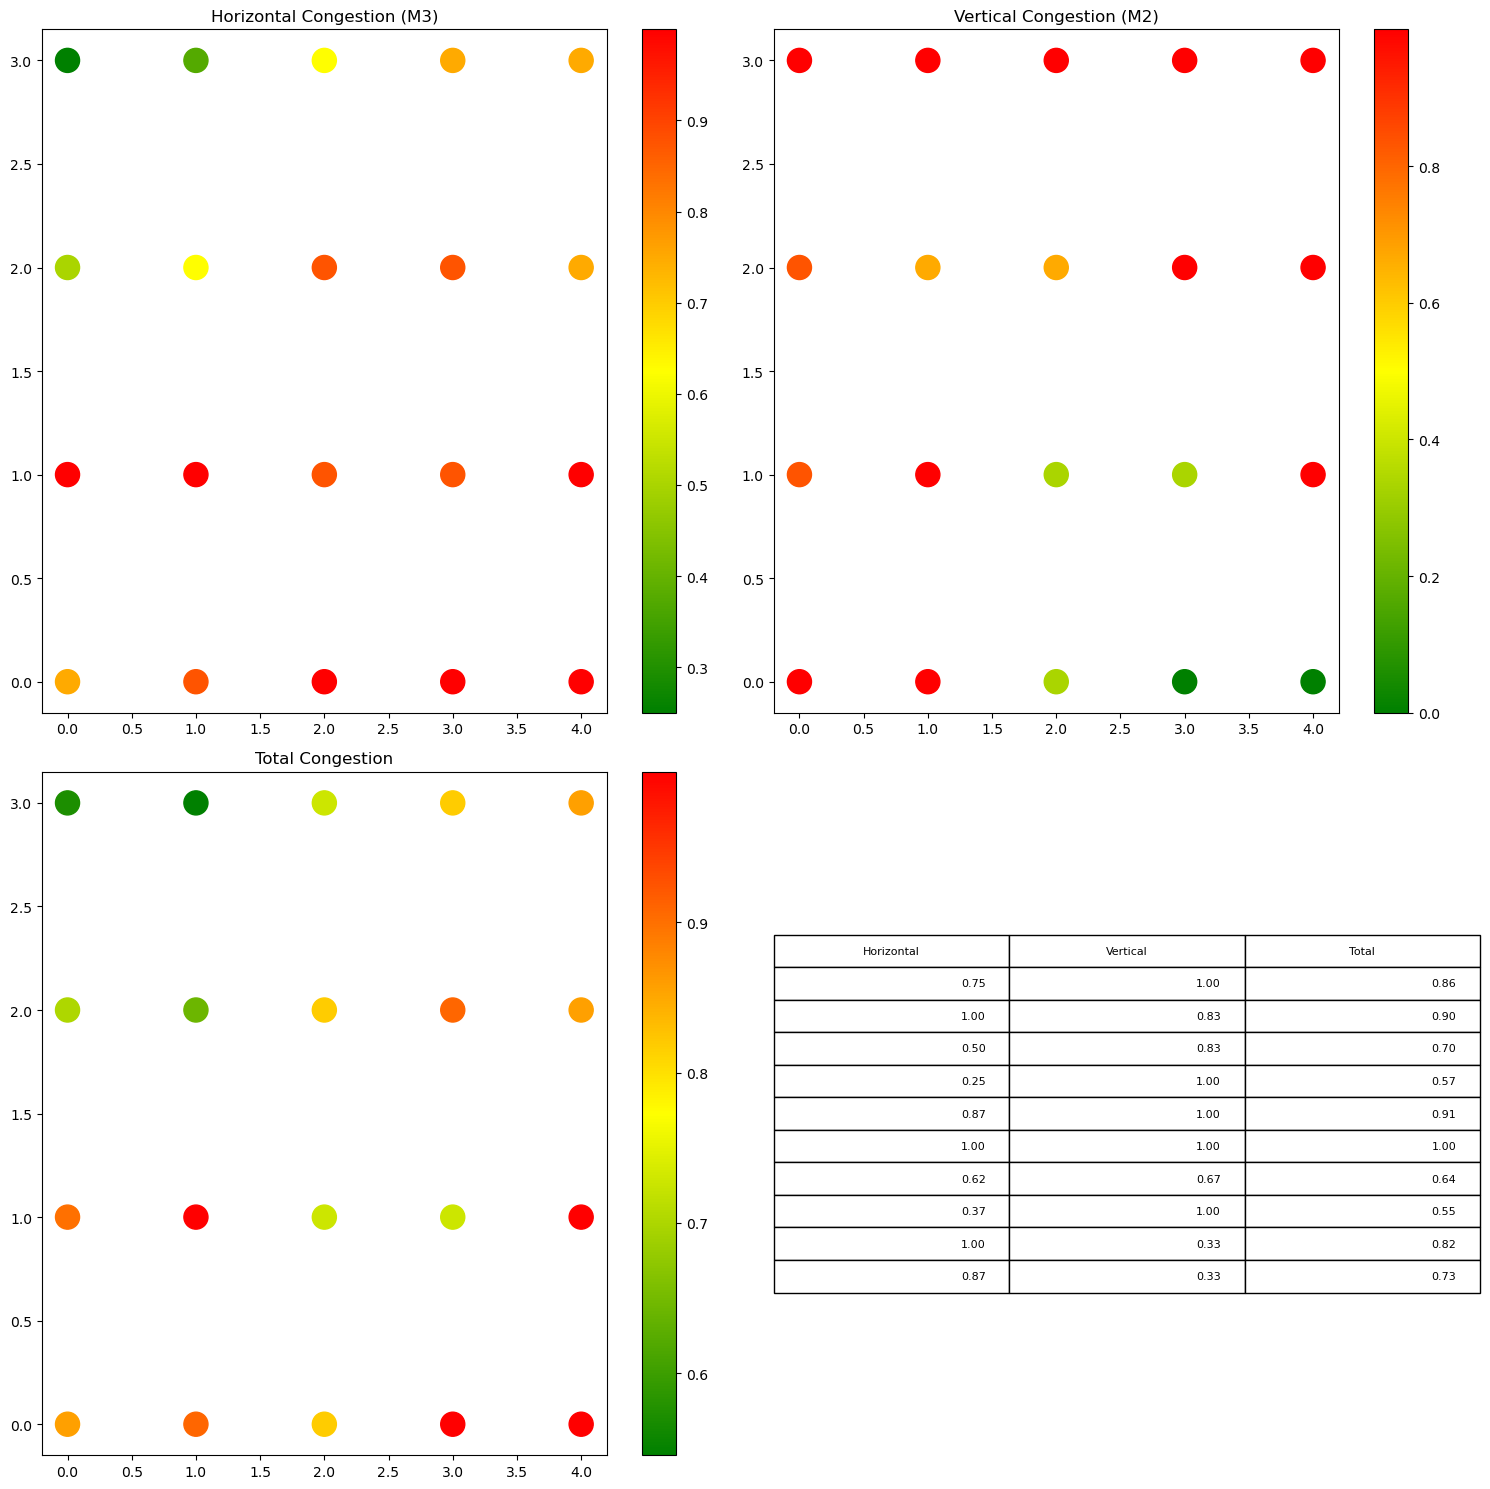

In [8]:
if __name__ == "__main__":
    advanced_visualization("congestion_data.csv")